In [1]:
%matplotlib inline
import pandas

In [2]:
sheet_id = "1o_ZBHoXGTnlDY1riAVMxqRVUgVoEDENEPyNWO6L3IaA"
sheet_name = "biblio"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

In [3]:
df = pandas.read_csv(url)

In [14]:
df.dropna(axis=1, how='all', inplace=True)

In [15]:
df.head()

,livro,titulo,autores,ISBN-13,ISBN-10,Paper,ISBN aproximado,versão brasileira,ano publicacao,edição,universidade,curso,periodo,complementar,disciplina
0,"Elmasri, R. Navathe. S.B. Sistemas de Bancos d...",sistemas de bancos de dados,"ramez elmasri, shamkant b. navathe",9.788589e+12,8.588639e+09,NaN,Não,Sim,2005.0,5.0,unirio,Bacharelado em Sistemas de Informação,NaN,NaN,TIN0120 - Bancos de Dados 1
1,"Elmasri, R. Navathe. S.B. Sistemas de Bancos d...",sistemas de bancos de dados,"ramez elmasri, shamkant b. navathe",9.788579e+12,8.579361e+09,NaN,Não,Sim,2010.0,6.0,unirio,Bacharelado em Sistemas de Informação,NaN,NaN,TIN0120 - Bancos de Dados 1
2,"Heuser, C.A. Projeto de Bancos de Dados. Sagra...",projeto de banco de dados,carlos alberto heuser,9.788578e+12,8.577804e+09,NaN,Não,Sim,2008.0,NaN,unirio,Bacharelado em Sistemas de Informação,NaN,NaN,TIN0120 - Bancos de Dados 1
3,"Date, C.J. Introdução a Sistemas de Bancos de ...",introdução a sistemas de bancos de dados,"date, c. j.",9.788535e+12,8.535206e+09,NaN,Não,Sim,2000.0,NaN,unirio,Bacharelado em Sistemas de Informação,NaN,NaN,TIN0120 - Bancos de Dados 1
4,"Date, C.J. Introdução a Sistemas de Bancos de ...",introdução a sistemas de bancos de dados,"date, c. j.",9.788535e+12,8.535206e+09,NaN,Não,Sim,2000.0,NaN,unirio,Bacharelado em Sistemas de Informação,NaN,NaN,TIN0169 - Bancos de Dados II


In [16]:
df.autores = df.autores.str.lower()

In [17]:
df.titulo = df.titulo.str.lower()

<AxesSubplot:>

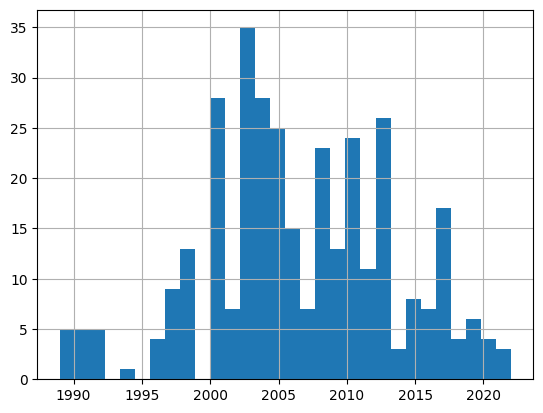

In [7]:
# bibliografias por ano

df["ano publicacao"].hist(bins=30)

In [8]:
df["ano publicacao"].value_counts().sort_index()

1989.0     4
1990.0     1
1991.0     5
1992.0     5
1994.0     1
1996.0     4
1997.0     9
1998.0    13
2000.0     7
2001.0    21
2002.0     7
2003.0    35
2004.0    28
2005.0    25
2006.0    15
2007.0     7
2008.0    23
2009.0    13
2010.0    24
2011.0     9
2012.0     2
2013.0    26
2014.0     3
2015.0     8
2016.0     7
2017.0    17
2018.0     4
2019.0     6
2020.0     4
2021.0     2
2022.0     1
Name: ano publicacao, dtype: int64

In [9]:
# autores mais usados
df.autores.value_counts()

ramez elmasri, shamkant b. navathe                                                      28
korth, h. f.; silberschatz, a.; sudarshan, s.                                           26
date, c. j.                                                                             21
carlos alberto heuser                                                                   20
johannes gehrke, raghu ramakrishnan                                                     18
                                                                                        ..
abadi, daniel; boncz, peter; harizopoulos, stavros                                       1
babu; shivnath; herodotou; herodotos                                                     1
faerber; frans; kemper; alfons; larson; per-ake; levandoski; justin; neumann; thomas     1
hellerstein, joseph m.; stonebraker, michael; hamilton, james                            1
brendan burns                                                                            1

In [10]:
df.titulo.value_counts()

sistemas de bancos de dados                                                   53
introdução a sistemas de bancos de dados                                      21
projeto de banco de dados                                                     20
sistemas de gerenciamento de banco de dados                                   18
database systems: the complete book                                           12
                                                                              ..
massively parallel databases and mapreduce systems                             1
main memory database systems                                                   1
architecture of a database system (foundations and trends(r) in databases)     1
principios de sistemas de bancos de dados distribuidos                         1
kubernetes basico - mergulhe no futuro da infraestrutura                       1
Name: titulo, Length: 140, dtype: int64

In [11]:
df.groupby("autores").agg({"titulo": ["count"]}).sort_values(("titulo", "count"), ascending=False)

,titulo
,count
autores,
"ramez elmasri, shamkant b. navathe",28
"korth, h. f.; silberschatz, a.; sudarshan, s.",26
"date, c. j.",21
carlos alberto heuser,20
"johannes gehrke, raghu ramakrishnan",18
...,...
"géron, aurélien",1
"goodfellow, i.; bengio, y.; courville, a.",1


In [12]:
df["versão brasileira"].value_counts()

Não    183
Sim    152
Name: versão brasileira, dtype: int64

In [18]:
df_by_universidade = df.groupby("universidade")

In [19]:
# bibliografia mais velha e mais nova por universidade
df_by_universidade.agg({"ano publicacao": ["min", "max"]})

ano publicacao        
                           min     max
universidade                          
UFES                    1998.0  2017.0
UFES/São Mateus         1991.0  2019.0
puc/rio                 1996.0  2020.0
ufam                    2003.0  2015.0
ufpr                    1990.0  2017.0
unicamp                 2003.0  2010.0
unirio                  1998.0  2010.0
usp/sc                  1989.0  2022.0
usp/sp                  2003.0  2019.0

array([[<AxesSubplot:title={'center':'UFES'}>,
        <AxesSubplot:title={'center':'UFES/São Mateus'}>,
        <AxesSubplot:title={'center':'puc/rio'}>],
       [<AxesSubplot:title={'center':'ufam'}>,
        <AxesSubplot:title={'center':'ufpr'}>,
        <AxesSubplot:title={'center':'unicamp'}>],
       [<AxesSubplot:title={'center':'unirio'}>,
        <AxesSubplot:title={'center':'usp/sc'}>,
        <AxesSubplot:title={'center':'usp/sp'}>]], dtype=object)

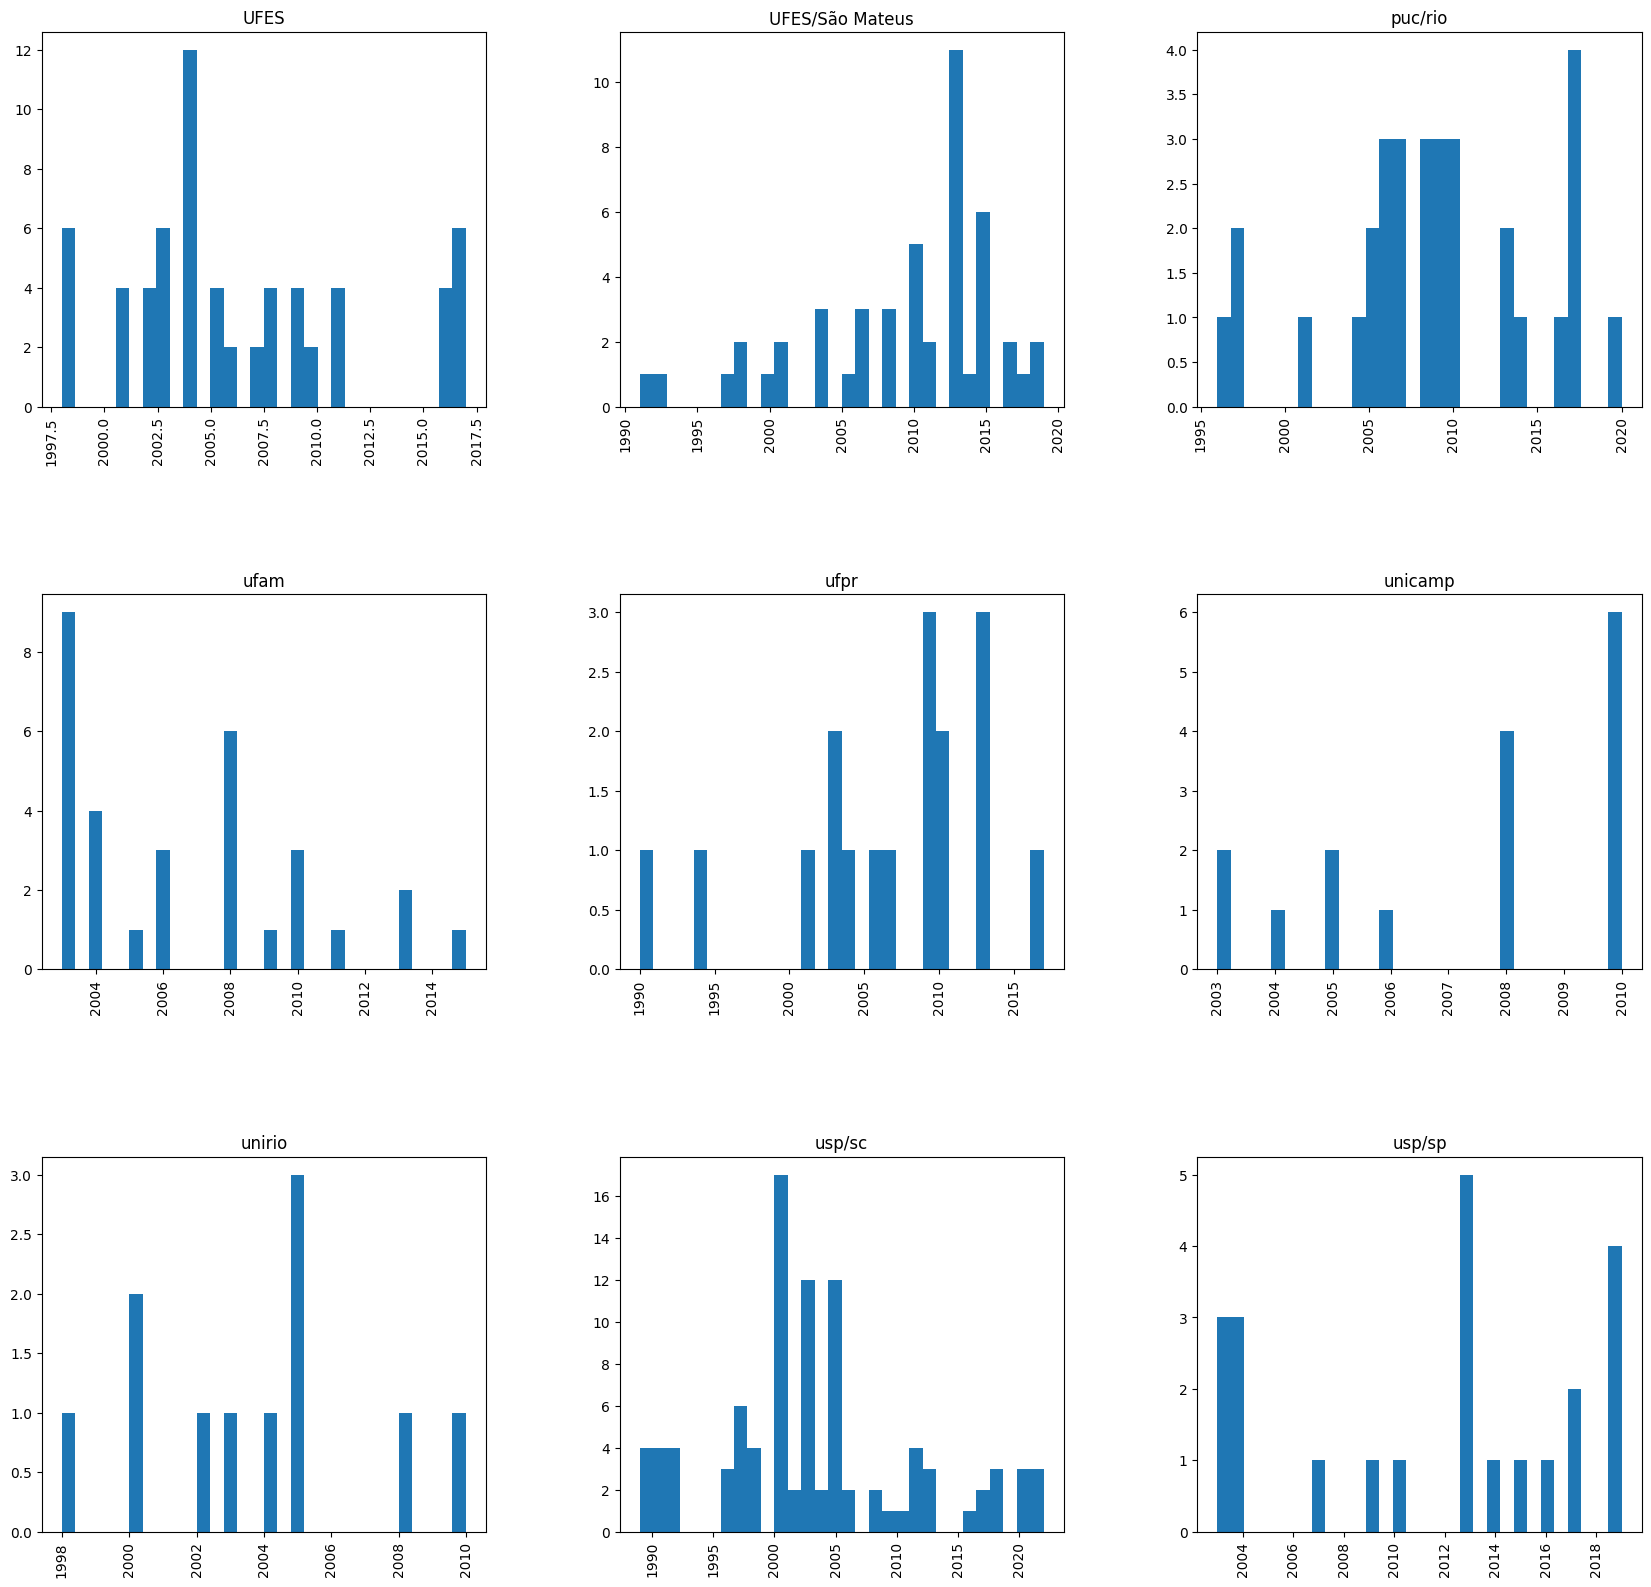

In [26]:
# Histograma ano bibliografia por universidade
df["ano publicacao"].hist(by=df.universidade, bins=30, figsize=(20,20))